# Optimisation sans contrainte

Dans ce notebook, nous exporons le principes d'optimisation sans contraintes avec la fonctions quadratique (Point Selle)

## Noms des membres du groupe

1. DONGMO TCHOUMENE ANITA BELVIANE        **22W2184**
2. BOKOU-BOUNA-ANGE-LARISSA               **22W2188**
3. JIATSA ROMMEL JUNIOR                   **22T2906**

Ce notebook étudie le comportement des algorithmes de gradient sur une fonction quadratique non-convexe :$$f(x, y) = x^2 - y^2$$Cette fonction possède un Point Selle en $(0,0)$. Contrairement à un minimum local, ce point est un minimum selon l'axe $x$ mais un maximum selon l'axe $y$.

## 1. Importation et Définition de la Fonction

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Définition de la Fonction et du Gradient ---

def f_saddle(x, y):
    """Fonction quadratique indéfinie (Point Selle)."""
    return x**2 - y**2

def grad_f_saddle(x, y):
    """
    Gradient de f(x, y).
    nabla f = [2x, -2y]
    """
    return np.array([2 * x, -2 * y])

## 2. Implémentation de La Méthode de Plus Profonde Descente (avec calcul analytique du pas optimal).

In [3]:
def steepest_descent_saddle(x_init, max_iter=20, tol=1e-5):
    x_k = x_init.copy()
    history = [x_k.copy()]
    
    for k in range(max_iter):
        xk, yk = x_k[0], x_k[1]
        grad = grad_f_saddle(xk, yk)
        
        # Critère d'arrêt
        if np.linalg.norm(grad) < tol:
            break
            
        # Calcul du pas optimal s_k
        # Attention : Pour un point selle, le dénominateur peut être nul ou négatif !
        denominator = xk**2 - yk**2
        
        if abs(denominator) < 1e-10:
            print(f" Arrêt Pas Optimal : Division par zéro à l'itération {k}")
            break
            
        s_k = 0.5 * (xk**2 + yk**2) / denominator
        
        # Mise à jour
        x_k -= s_k * grad
        history.append(x_k.copy())
        
        # Sécurité divergence
        if np.linalg.norm(x_k) > 100:
            print(f" Arrêt Pas Optimal : Divergence détectée à l'itération {k}")
            break

    return np.array(history)

## 3. Implémentation de L'Algorithme de Gradient à Pas Fixe.

In [5]:
def fixed_step_gradient_descent(x_init, s_fixe, max_iter=20, tol=1e-5):
    x_k = x_init.copy()
    history = [x_k.copy()]
    
    for k in range(max_iter):
        xk, yk = x_k[0], x_k[1]
        grad = grad_f_saddle(xk, yk)
        
        if np.linalg.norm(grad) < tol:
            break
            
        x_k -= s_fixe * grad
        history.append(x_k.copy())
        
        if np.linalg.norm(x_k) > 100:
            print(f" Arrêt Pas Fixe : Divergence détectée à l'itération {k}")
            break
    
    return np.array(history)

## 4. Expérimentation

Nous lançons les deux algorithmes depuis le point $x_0 = (2, 0.1)$. Ce point est proche de l'axe des $x$ (où la fonction est convexe), mais avec une légère perturbation en $y$ (où la fonction est concave)

In [7]:
# Point initial
x0 = np.array([2.0, 0.1]) 

print("--- Résultats de l'Optimisation ---")

# 1. Exécution Pas Optimal
history_sd = steepest_descent_saddle(x0, max_iter=20)
print(f"Pas Optimal : {len(history_sd)-1} itérations effectuées.")

# 2. Exécution Pas Fixe (s=0.1)
s_fixe = 0.1
history_fixed = fixed_step_gradient_descent(x0, s_fixe, max_iter=20)
print(f"Pas Fixe (s={s_fixe}) : {len(history_fixed)-1} itérations effectuées.")

--- Résultats de l'Optimisation ---
Pas Optimal : 6 itérations effectuées.
Pas Fixe (s=0.1) : 20 itérations effectuées.


## 5. Visualisation Graphique

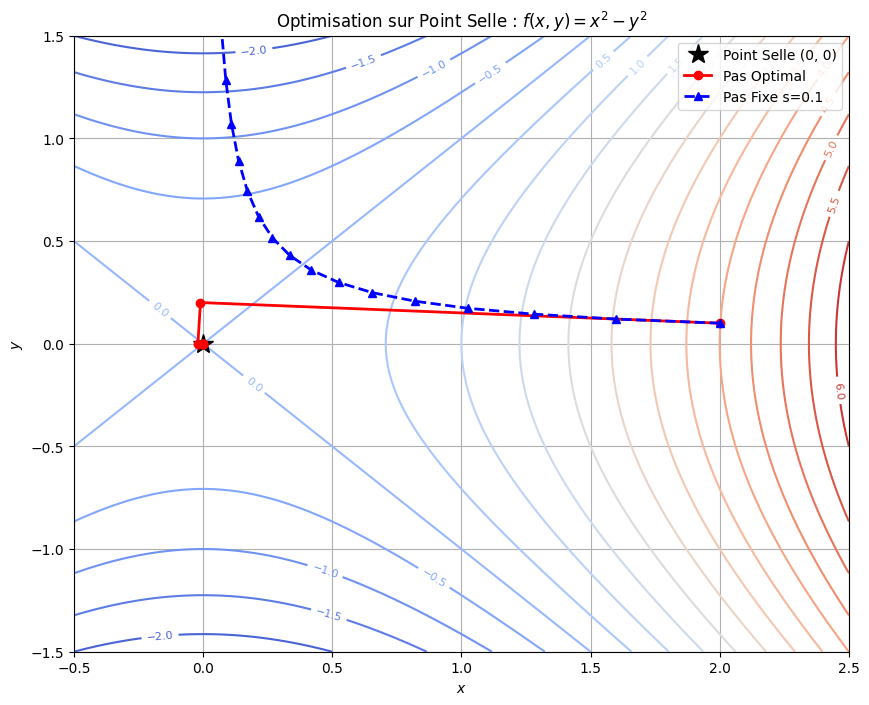

In [8]:
# Création de la grille pour le tracé
x_min, x_max = -0.5, 2.5
y_min, y_max = -1.5, 1.5
X, Y = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = f_saddle(X, Y)

plt.figure(figsize=(10, 8))

# Courbes de niveau (Contour Plot)
CS = plt.contour(X, Y, Z, levels=20, cmap='coolwarm')
plt.clabel(CS, inline=1, fontsize=8)
plt.title("Optimisation sur Point Selle : $f(x,y) = x^2 - y^2$")
plt.xlabel('$x$')
plt.ylabel('$y$')

# Marquer le Point Selle (0,0)
plt.plot(0, 0, 'k*', markersize=15, label='Point Selle (0, 0)')

# Trajectoire Pas Optimal (Rouge)
plt.plot(history_sd[:, 0], history_sd[:, 1], 'r-o', linewidth=2, label='Pas Optimal')

# Trajectoire Pas Fixe (Bleu)
plt.plot(history_fixed[:, 0], history_fixed[:, 1], 'b--^', linewidth=2, label=f'Pas Fixe s={s_fixe}')

plt.legend()
plt.grid(True)
plt.axis([x_min, x_max, y_min, y_max])
plt.show()

## 5. Analyse des Résultats

#### 1. Méthode de Plus Profonde Descente (Pas Optimal)
L'application de la méthode du pas optimal sur la fonction non-convexe $f(x, y) = x^2 - y^2$ révèle une défaillance théorique majeure. La formule du pas optimal analytique est :$$s_k = \frac{1}{2} \frac{x_k^2 + y_k^2}{x_k^2 - y_k^2}$$Le dénominateur dépend de la position dans l'espace.Tant que $|x_k| > |y_k|$ (zone où la courbure locale est dominée par la convexité en $x$), le pas est positif et l'algorithme progresse.Cependant, si l'algorithme s'approche des diagonales $|x| \approx |y|$, le dénominateur tend vers 0, provoquant un pas $s_k$ infiniment grand.Si $|y| > |x|$, le dénominateur devient négatif. Un pas négatif inverse la logique de l'algorithme : au lieu de descendre le gradient, il remonte la pente, rendant la méthode totalement instable. Cela confirme que cette méthode est strictement réservée aux fonctions convexes définies positives.

#### 2. Algorithme de Gradient à Pas Fixe
L'algorithme à pas fixe montre un comportement découplé caractéristique des points selles :Sur l'axe $x$ (Convergence) : Le gradient est $2x$. La mise à jour est $x_{k+1} = x_k(1 - 2s)$. Pour un pas $s < 1$, $x$ converge efficacement vers 0. C'est ce que l'on observe sur la courbe bleue : elle se déplace vers la gauche.Sur l'axe $y$ (Divergence) : Le gradient est $-2y$. La mise à jour est $y_{k+1} = y_k - s(-2y_k) = y_k(1 + 2s)$. Le terme $(1+2s)$ étant toujours strictement supérieur à 1 (pour $s>0$), la coordonnée $y$ est amplifiée géométriquement à chaque itération.Conclusion : L'algorithme "glisse" le long du point selle : il minimise correctement $x$ mais est expulsé vers l'infini le long de l'axe $y$ (car la fonction n'est pas bornée inférieurement), illustrant le danger des points selles en optimisation non-convexe.